# `requests`
[Start in JupyterHub](https://jupyterhub.zdv.uni-mainz.de/hub/user-redirect/git-pull?repo=https://gitlab.rlp.net/fsvmatheinformatik/advancedpython&urlpath=tree/advancedpython/third-party-libs/requests.ipynb&branch=master)
(The Part with api.met.no and the mensa will not work because of the missing internet connection. Use this link in this cases. [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.rlp.net%2Ffsvmatheinformatik%2Fadvancedpython/master?filepath=third-party-libs%2Frequests.ipynb))

`requests` is a library for making HTTP requests. Working with HTTP can get very verbose in other languages.

## Weather Mainz JSON

In [1]:
import requests
BASE_URL = "http://ipa-wetter-01.zdv.uni-mainz.de/wetter/wetter.json"
requests.get(BASE_URL)

<Response [200]>

In [3]:
response = requests.get(BASE_URL)
response.ok

True

In [11]:
print(response.text)
data = response.json()
print(data)
print(f"{data['Temperatur']} °C")

{"Temperatur":  15.86 , "Stationsdruck": 1003.41 , "relative_Feuchte":   42.25 , "Wingeschwindigkeit":  2.92 , "Windrichtung":  245.83 }
{'Temperatur': 15.86, 'Stationsdruck': 1003.41, 'relative_Feuchte': 42.25, 'Wingeschwindigkeit': 2.92, 'Windrichtung': 245.83}
15.86 °C


## Weather Mainz XML

In [13]:
import requests
import xml.etree.ElementTree as ET

BASE_URL = "http://ipa-wetter-01.zdv.uni-mainz.de/wetter/wetter.xml"
requests.get(BASE_URL)

<Response [200]>

In [14]:
response = requests.get(BASE_URL)
response.ok

True

In [22]:
print(response.text)
root = ET.fromstring(response.text)
print(root)
for child in root:
    value, unit = child
    print(f"{child.tag}: {value.text} {unit.text}")

<?xml version="1.0" ?>
<UniMainzWetter>
	<Datum>
		<Wert>25.03.2021</Wert>
		<Format>dd.mm.yyyy</Format>
	</Datum>
	<Uhrzeit>
		<Wert>15:10:29</Wert>
		<Format>hh:mm:ss</Format>
	</Uhrzeit>
	<Temperatur>
		<Wert> 15.86 </Wert>
		<Format>Â°C</Format>
	</Temperatur>
	<Luftdruck>
		<Wert>1003.41 </Wert>
		<Format>hPa</Format>
	</Luftdruck>
	<Luftfeuchte>
		<Wert>  42.25 </Wert>
		<Format>%</Format>
	</Luftfeuchte>
	<Windgeschwindigkeit>
		<Wert>  2.92 </Wert>
		<Format>m/s</Format>
	</Windgeschwindigkeit>
	<Windrichtung>
		<Wert> 245.83 </Wert>
		<Format>Grad</Format>
	</Windrichtung>
</UniMainzWetter>

<Element 'UniMainzWetter' at 0x7f2b602f41d0>
Datum: 25.03.2021 dd.mm.yyyy
Uhrzeit: 15:10:29 hh:mm:ss
Temperatur:  15.86  Â°C
Luftdruck: 1003.41  hPa
Luftfeuchte:   42.25  %
Windgeschwindigkeit:   2.92  m/s
Windrichtung:  245.83  Grad


## Bigger API

https://api.met.no/weatherapi/locationforecast/2.0/documentation

In [8]:
LON = 8.2791
LAT = 49.98419

In [26]:
import requests
BASE_URL = "https://api.met.no/weatherapi/locationforecast/2.0/complete"
HEADERS = {
    'User-Agent': 'Advanced Python fsvmatheinformatik.pages.gitlab.rlp.net/advancedpython'
}
requests.get(BASE_URL+f"?lat={LAT}&lon={LON}", headers=HEADERS)

<Response [200]>

In [27]:
response = requests.get(BASE_URL, params={"lon": LON, "lat": LAT}, headers=HEADERS)

In [28]:
response.status_code

200

In [29]:
response.text

'{"type":"Feature","geometry":{"type":"Point","coordinates":[8.2791,49.98419,127]},"properties":{"meta":{"updated_at":"2021-03-09T20:18:55Z","units":{"air_pressure_at_sea_level":"hPa","air_temperature":"celsius","air_temperature_max":"celsius","air_temperature_min":"celsius","cloud_area_fraction":"%","cloud_area_fraction_high":"%","cloud_area_fraction_low":"%","cloud_area_fraction_medium":"%","dew_point_temperature":"celsius","fog_area_fraction":"%","precipitation_amount":"mm","relative_humidity":"%","ultraviolet_index_clear_sky":"1","wind_from_direction":"degrees","wind_speed":"m/s"}},"timeseries":[{"time":"2021-03-09T22:00:00Z","data":{"instant":{"details":{"air_pressure_at_sea_level":1019.2,"air_temperature":3.4,"cloud_area_fraction":59.4,"cloud_area_fraction_high":0.0,"cloud_area_fraction_low":54.7,"cloud_area_fraction_medium":21.1,"dew_point_temperature":2.6,"fog_area_fraction":0.0,"relative_humidity":94.4,"ultraviolet_index_clear_sky":0.0,"wind_from_direction":254.2,"wind_speed":

In [30]:
data = response.json()

In [35]:
data["properties"]["timeseries"][0]

{'time': '2021-03-09T22:00:00Z',
 'data': {'instant': {'details': {'air_pressure_at_sea_level': 1019.2,
    'air_temperature': 3.4,
    'cloud_area_fraction': 59.4,
    'cloud_area_fraction_high': 0.0,
    'cloud_area_fraction_low': 54.7,
    'cloud_area_fraction_medium': 21.1,
    'dew_point_temperature': 2.6,
    'fog_area_fraction': 0.0,
    'relative_humidity': 94.4,
    'ultraviolet_index_clear_sky': 0.0,
    'wind_from_direction': 254.2,
    'wind_speed': 1.3}},
  'next_12_hours': {'summary': {'symbol_code': 'partlycloudy_day'}},
  'next_1_hours': {'summary': {'symbol_code': 'partlycloudy_night'},
   'details': {'precipitation_amount': 0.0}},
  'next_6_hours': {'summary': {'symbol_code': 'partlycloudy_night'},
   'details': {'air_temperature_max': 3.1,
    'air_temperature_min': 2.3,
    'precipitation_amount': 0.1}}}}

In [37]:
time = data["properties"]["timeseries"][0]["time"]
print(f"{time}: {data['properties']['timeseries'][0]['data']['instant']['details']['air_temperature']} °C")

2021-03-09T22:00:00Z: 3.4 °C


## Mensa

https://www.studierendenwerk-mainz.de/speiseplan/Speiseplan.xml

In [38]:
response2 = requests.get(f"https://www.studierendenwerk-mainz.de/speiseplan/Speiseplan.xml")

In [39]:
response2.raise_for_status()

In [40]:
response2.text

'<?xml version="1.0" encoding="utf-8" standalone="yes"?>\r\n<DATAPACKET Version="2.0">\r\n<METADATA>\r\n<FIELDS>\r\n<FIELD FieldName="DATUM" DisplayLabel="DATUM" FieldType="DateTime" FieldClass="TField"/>\r\n<FIELD FieldName="VERBRAUCHSORT" DisplayLabel="VERBRAUCHSORT" FieldType="Integer" FieldClass="TField"/>\r\n<FIELD FieldName="ARTNR" DisplayLabel="ARTNR" FieldType="Integer" FieldClass="TField"/>\r\n<FIELD FieldName="GEBNR" DisplayLabel="GEBNR" FieldType="Integer" FieldClass="TField"/>\r\n<FIELD FieldName="AUSGABETEXT" DisplayLabel="AUSGABETEXT" FieldType="String" FieldClass="TField"/>\r\n<FIELD FieldName="MENSA" DisplayLabel="MENSA" FieldType="String" FieldClass="TField"/>\r\n<FIELD FieldName="ORT" DisplayLabel="ORT" FieldType="Integer" FieldClass="TField"/>\r\n<FIELD FieldName="SPEISE" DisplayLabel="SPEISE" FieldType="String" FieldClass="TField"/>\r\n<FIELD FieldName="TYP" DisplayLabel="TYP" FieldType="Integer" FieldClass="TField"/>\r\n<FIELD FieldName="MENUEKENNZTEXT" DisplayLabe

In [41]:
from datetime import date
today = date.today().strftime('%d.%m.%Y')

In [42]:
# Using re istead of xml, because the data is not ordered and this is faster
pattern = fr"""<ROW DATUM="{today}".*AUSGABETEXT="(?P<food>[^"]*)".*?SPEISE="Thekenessen GFG".*?STUDIERENDE=" *(?P<cost>[^"]*) *".*/>"""

In [44]:
import re
matches = re.findall(pattern, response2.text)
matches

[]

In [45]:
for food, cost in set(matches):
    print(food)
    print(cost)

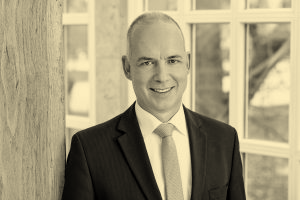

In [46]:
import numpy as np
import requests

from io import BytesIO
from PIL import Image

# putting it all together

res = requests.get("https://organisation.uni-mainz.de/files/2019/02/Prof_Krausch_031-300x200.jpg", stream=True)
res.raise_for_status()
data = res.content
the_president = Image.open(BytesIO(data))

# https://en.wikipedia.org/wiki/List_of_software_palettes#Color_gradient_palettes
sepia_palette = np.stack([
    np.linspace(0, 255, num=256, dtype=np.uint8),
    np.linspace(0, 240, num=256, dtype=np.uint8),
    np.linspace(0, 192, num=256, dtype=np.uint8)
], axis=1).flatten()

the_president = the_president.convert("L")
the_president.putpalette(sepia_palette)
the_president.convert("RGB")